<a href="https://colab.research.google.com/github/MSDEOKAR/A-JARVIS/blob/main/emotion_detection_text_classifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns

In [ ]:
import neattext.functions as nfx


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
df = pd.read_csv("/content/dataset/test_sent_emo.csv")

In [ ]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378"
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385"
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833"


In [ ]:
df.shape

(2610, 11)

In [ ]:
df.dtypes

Sr No.           int64
Utterance       object
Speaker         object
Emotion         object
Sentiment       object
Dialogue_ID      int64
Utterance_ID     int64
Season           int64
Episode          int64
StartTime       object
EndTime         object
dtype: object

In [ ]:
df.isnull().sum()

Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64

In [ ]:
df['Emotion'].value_counts()

neutral     1256
joy          402
anger        345
surprise     281
sadness      208
disgust       68
fear          50
Name: Emotion, dtype: int64

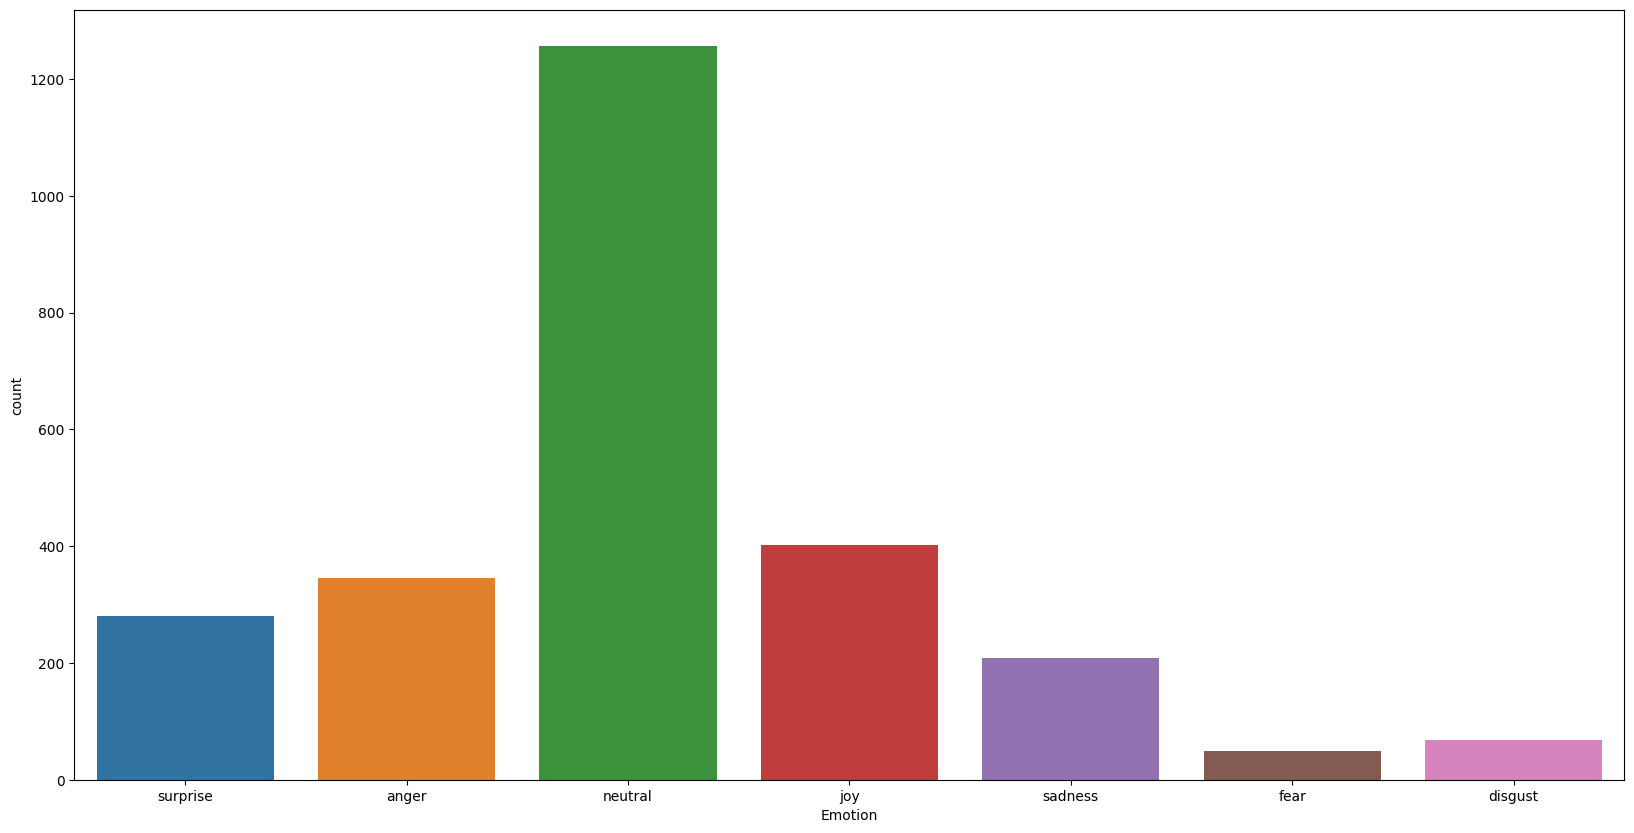

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
  blob=TextBlob(text)
  sentiment=blob.sentiment.polarity
  if sentiment >0:
    result="Positive"
  elif sentiment<0:
    result="Negative"
  else:
    result="Neutral"
  return result

In [ ]:
get_sentiment("I  you")

'Neutral'

In [ ]:
df['Sentiment']=df['Emotion'].apply(get_sentiment)


In [ ]:
df = df[['Utterance', 'Emotion', 'Sentiment']]

In [ ]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,Why do all youre coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378"
1,2,Oh. Thats so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385"
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833"


In [ ]:
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     negative      345
disgust   negative       68
fear      negative       50
joy       positive      402
neutral   neutral      1256
sadness   negative      208
surprise  negative      162
          positive      119
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

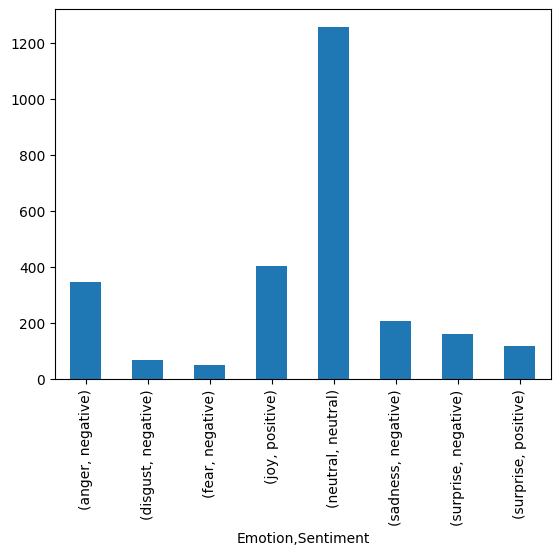

In [ ]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

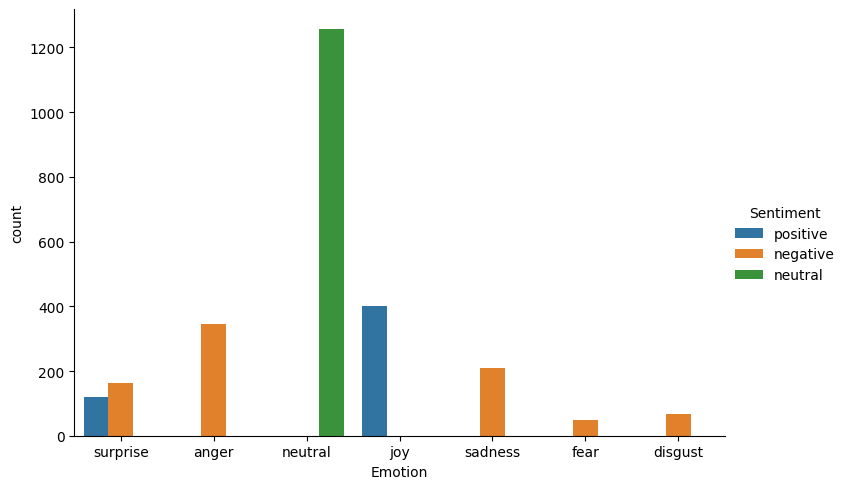

In [ ]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',aspect=1.5)

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df['Clean_Text']=df['Utterance'].apply(nfx.remove_accents)

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_non_ascii)

In [ ]:
df[['Utterance','Clean_Text']]

,Utterance,Clean_Text
0,Why do all youre coffee mugs have numbers on ...,youre coffee mugs numbers bottom
1,Oh. Thats so Monica can keep track. That way ...,Oh Thats Monica track way missing like Wheres ...
2,Y'know what?,Yknow what
3,"Come on, Lydia, you can do it.",Come on Lydia it
4,Push!,Push
...,...,...
2605,"Yeah, I mean, come on Ross, no one will even n...",Yeah mean come Ross notice mean theyre probabl...
2606,They’re not listening too me?,Theyre listening me
2607,Of course they’re listening to you! Everybody ...,course theyre listening you Everybody listens you
2608,Monica you really think I should try this phas...,Monica think try phasing thing


In [ ]:
from collections import Counter

In [ ]:
def extract_keywords(text,num=50):
  tokens=[tok for tok in text.split()]
  most_common_tokens=Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [ ]:
emotion_list=df['Emotion'].unique().tolist()

In [ ]:
emotion_list

['surprise', 'anger', 'neutral', 'joy', 'sadness', 'fear', 'disgust']

In [ ]:
joy_list=df[df['Emotion']=='joy']['Clean_Text']

In [ ]:
joy_docx=' '.join(joy_list)

In [ ]:
joy_docx

'Push Push em out push em out harder harder Push em out push em out way out Lets ball move hey hey ho ho Lets justyeah right Push Push it it Well makes feel good time it know mean Wow Ohokay look pal silly Love best medicine Thats laughter Good verbal contract binding state New York Yeah Yeah Yeah Hey Heyheyhey Were celebrating Joey got health insurance back Yeah Sure Yep Oh yknow what heard shot right now Id throw body you Oh yeah maybe walk bad neighborhood Okay Wait Wait wanna this divorce him half kingdom gonna mine No Joey UNIsex love Phoebe Hey Yeah did cute No deal on Really Okay Great Ohh welcome adult relationship Hi Yeah Ohh Im gonna news Hey guys Guess what Hey got one got one Hi Oh please II hate ball buster it Lets typographical error sex manual Oh yeah II like that No wantI want pinecones Thank delightful stay Oh maple candy Oh God crazy Chandler spun meoffthebed Wow Spinning sounds like fun Oh wish No know trying Rosss Hug Roll thing easyif want theres cookies counter or

In [ ]:
keyword_joy=extract_keywords(joy_docx)

In [ ]:
keyword_joy

{'Oh': 63,
 'Hey': 37,
 'Yeah': 34,
 'Im': 32,
 'you': 24,
 'great': 22,
 'it': 20,
 'Okay': 20,
 'Hi': 19,
 'good': 18,
 'like': 18,
 'think': 18,
 'know': 15,
 'love': 14,
 'right': 13,
 'gonna': 13,
 'its': 13,
 'got': 12,
 'Yknow': 11,
 'out': 10,
 'time': 10,
 'mean': 10,
 'No': 10,
 'Ohh': 10,
 'Thats': 9,
 'Joey': 9,
 'yknow': 9,
 'dont': 9,
 'me': 9,
 'Yes': 9,
 'best': 8,
 'yeah': 8,
 'that': 8,
 'Thank': 8,
 'thats': 8,
 'uh': 8,
 'guys': 7,
 'want': 7,
 'thing': 7,
 'youre': 7,
 'hey': 6,
 'Well': 6,
 'feel': 6,
 'look': 6,
 'on': 6,
 'one': 6,
 'here': 6,
 'come': 6,
 'Ive': 6,
 'thank': 6}

In [ ]:
def plot_most_common_words(mydict,emotion_name):
  df_01=pd.DataFrame(mydict.items(),columns=['token','count'])
  plt.figure(figsize=(20,10))
  plt.title("Plot of {} Most Common Keywords".format(emotion_name))
  sns.barplot(x='token',y='count',data=df_01)
  plt.xticks(rotation=45)
  plt.show()

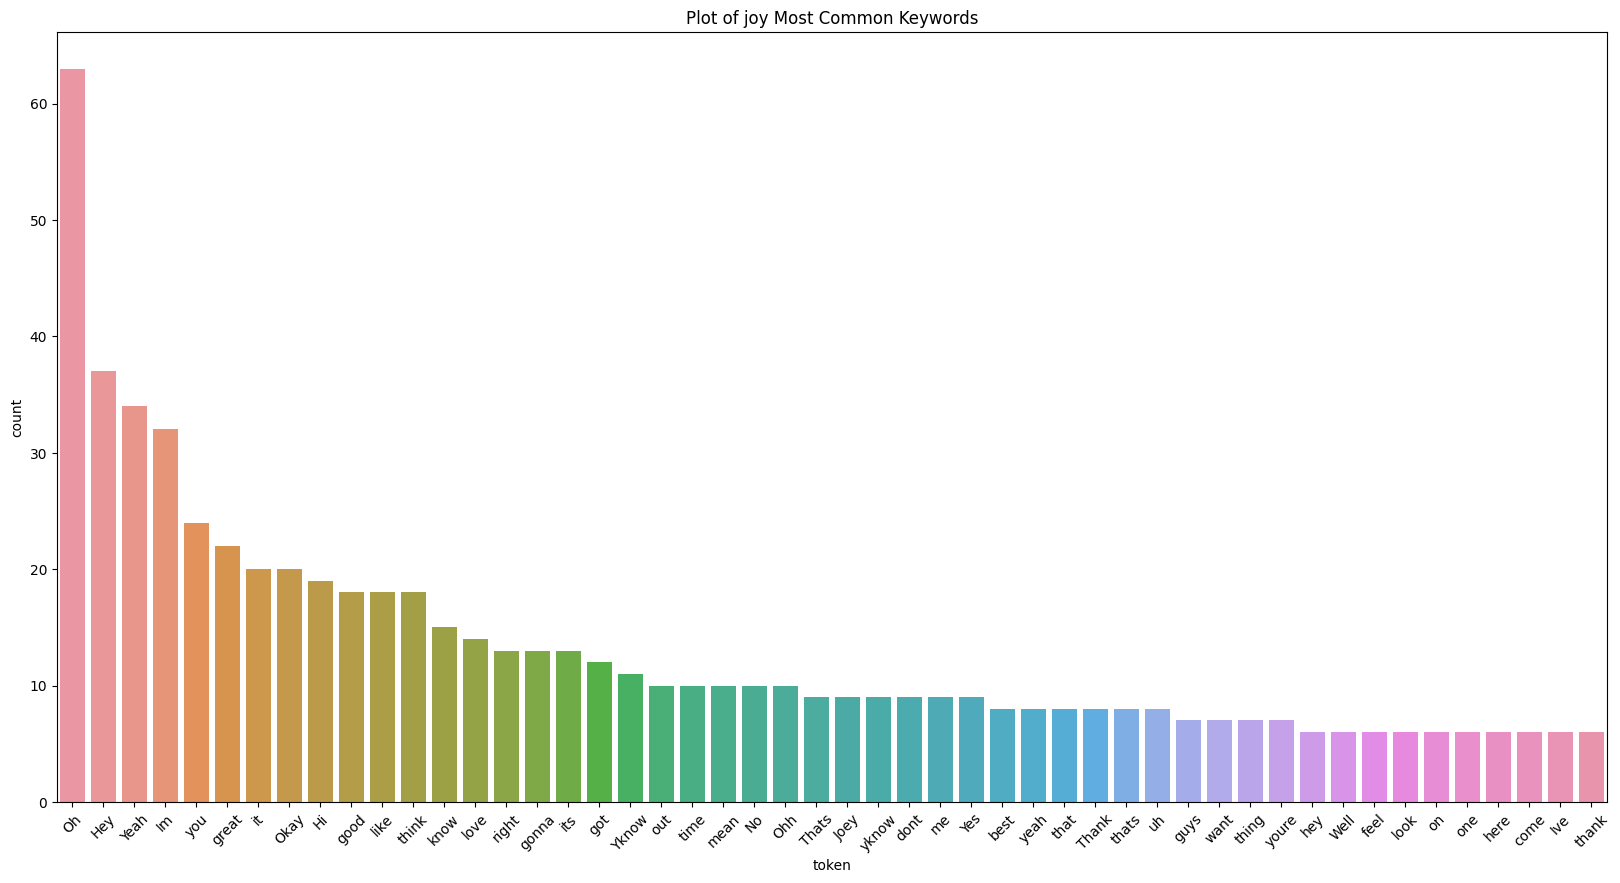

In [ ]:
plot_most_common_words(keyword_joy,"joy")

In [ ]:
surprise_list=df[df['Emotion']=='surprise']['Clean_Text'].tolist()
surprise_docx=' '.join(surprise_list)
keyword_surprise=extract_keywords(surprise_docx)

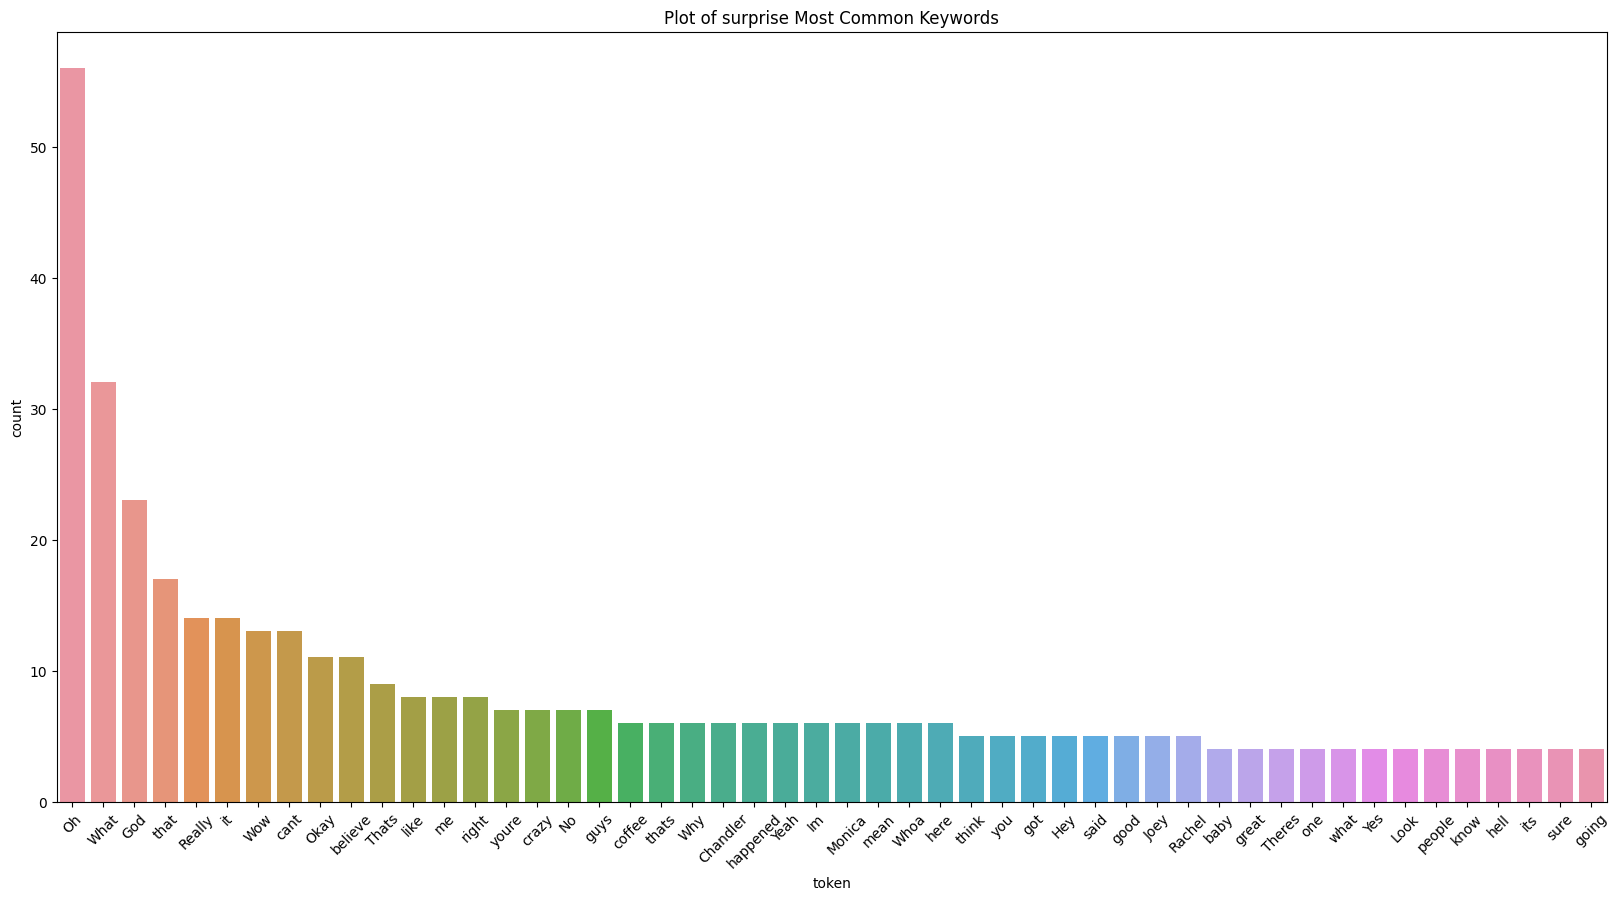

In [ ]:
plot_most_common_words(keyword_surprise,"surprise")

In [ ]:
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(docx):
  mywordcloud=WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

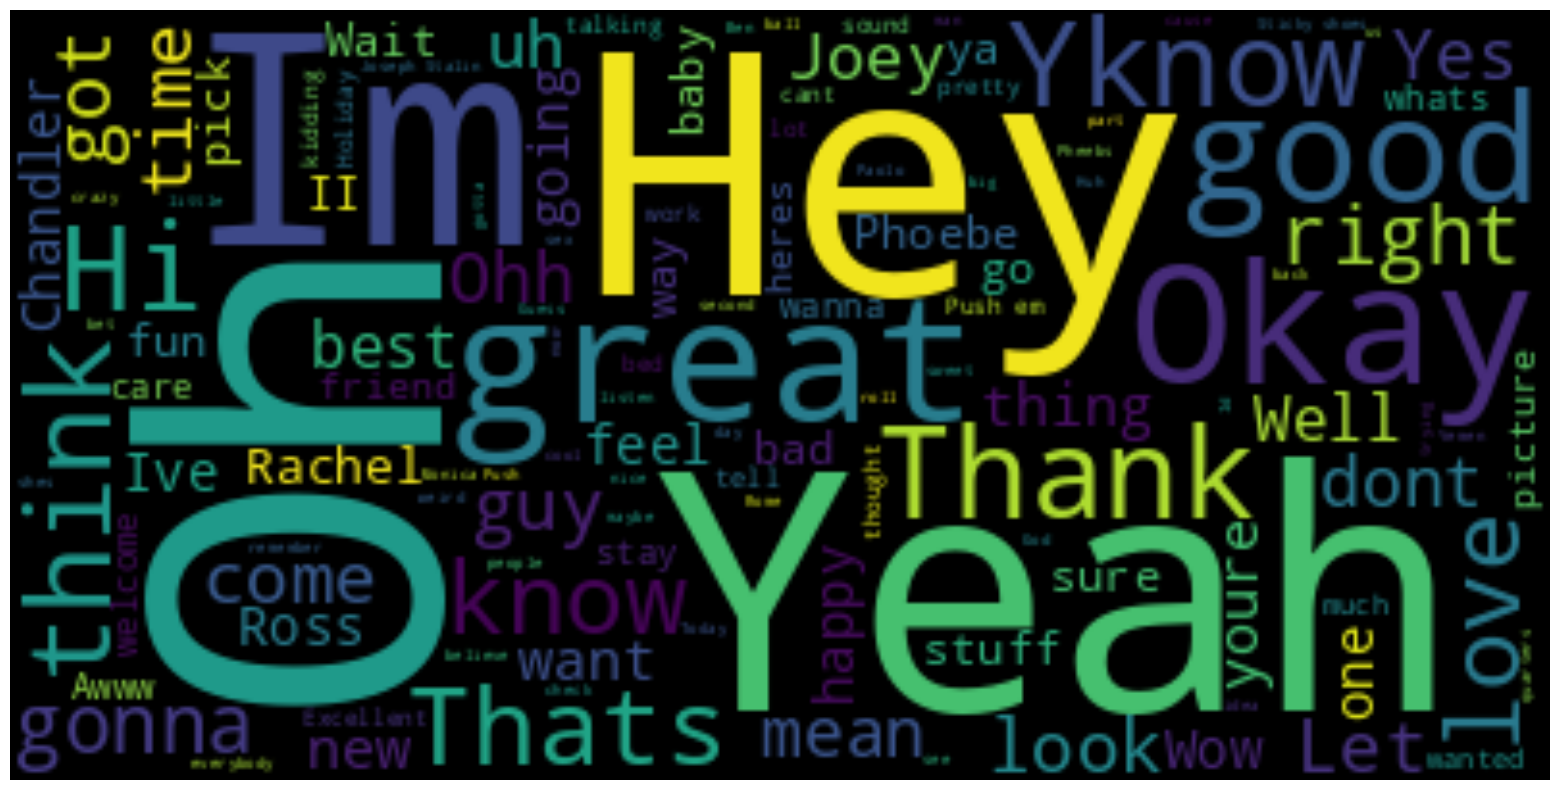

In [ ]:
plot_wordcloud(joy_docx)

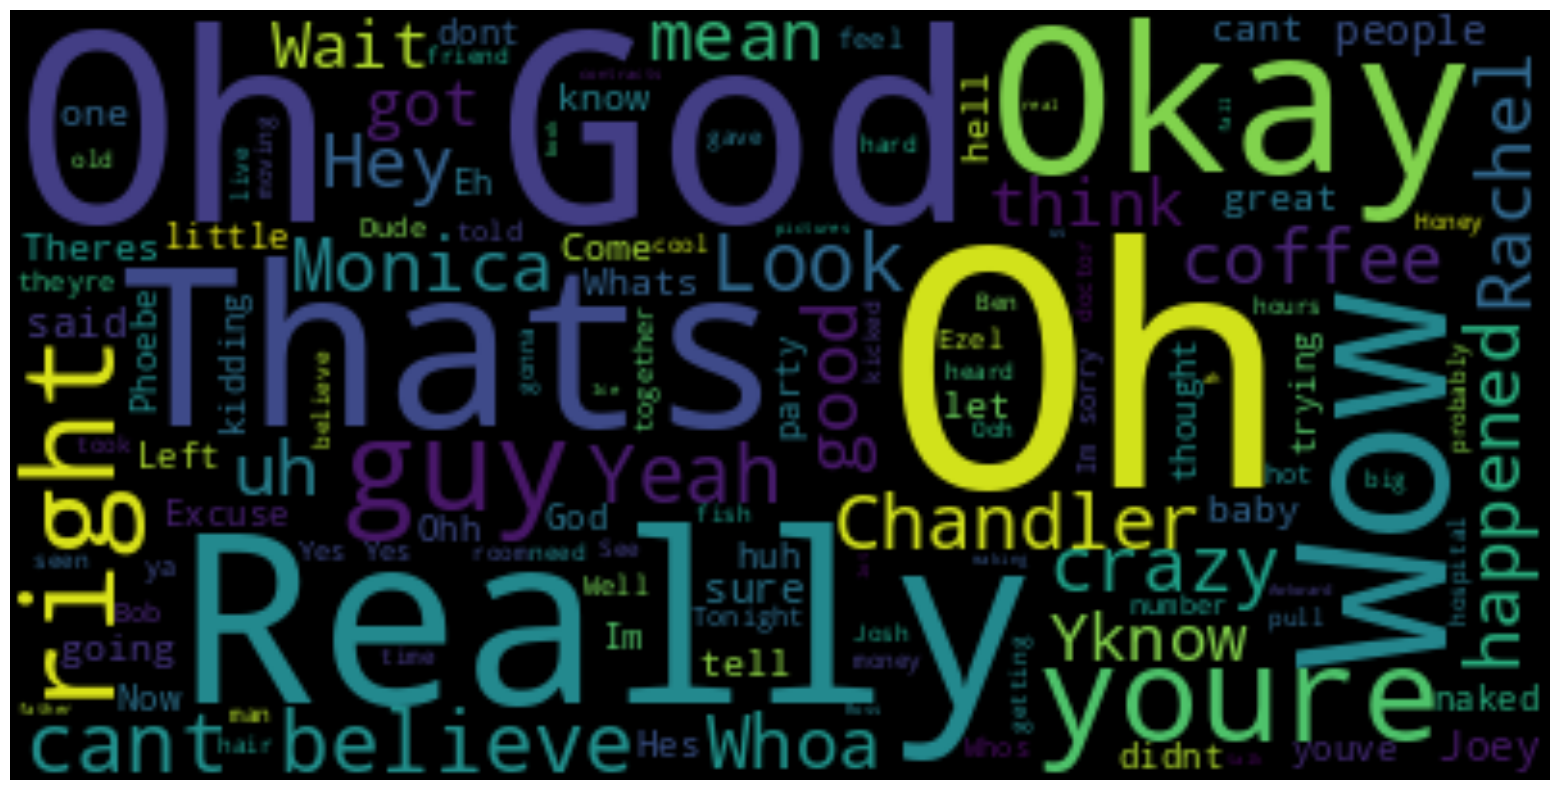

In [ ]:
plot_wordcloud(surprise_docx)

In [ ]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [ ]:
Xfeatures

0                        youre coffee mugs numbers bottom
1       Oh Thats Monica track way missing like Wheres ...
2                                              Yknow what
3                                        Come on Lydia it
4                                                    Push
                              ...                        
2605    Yeah mean come Ross notice mean theyre probabl...
2606                                  Theyre listening me
2607    course theyre listening you Everybody listens you
2608                       Monica think try phasing thing
2609                                      think look fine
Name: Clean_Text, Length: 2610, dtype: object

In [ ]:
cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [ ]:
cv.get_feature_names_out()

array(['00', '10', '100', ..., 'zana', 'zelner', 'zone'], dtype=object)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)


In [ ]:
nv_model=MultinomialNB()
nv_model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
nv_model.score(x_test,y_test)

0.4955300127713921

In [ ]:
y_pred_for_nv=nv_model.predict(x_test)

In [ ]:
y_pred_for_nv

array(['neutral', 'neutral', 'anger', 'neutral', 'neutral', 'neutral',
       'surprise', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'joy', 'neutral',
       'neutral', 'joy', 'neutral', 'anger', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'surprise', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'joy',
       'neutral', 'anger', 'neutral', 'neutral', 'neutral', 'joy',
       'neutral', 'neutral', 'neutral', 'surprise', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'joy', 'neutral', 'joy', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'surprise', 'neutral', 'neutral', 'neutral',
    

In [ ]:
sample_text=["Wow this good"]

In [ ]:
vect=cv.transform(sample_text).toarray()

In [ ]:
nv_model.predict(vect)

array(['neutral'], dtype='<U8')

In [ ]:
nv_model.predict_proba(vect)

array([[5.84670520e-03, 6.36570893e-05, 8.25958483e-05, 3.22236195e-02,
        9.54630678e-01, 3.63759306e-03, 3.51515145e-03]])

In [ ]:
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness',
       'surprise'], dtype='<U8')

In [ ]:
np.max(nv_model.predict_proba(vect))

0.9546306778226464

In [ ]:
def predict_emotion(sample_text,model):
  myvect=cv.transform(sample_text).toarray()
  prediction=model.predict(myvect)
  pred_proba=model.predict_proba(myvect)
  pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
  print("Prediction:{},Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
  print(prediction[0])
  return pred_percentage_for_all

In [ ]:
predict_emotion(sample_text,nv_model)

Prediction:joy,Prediction Score:0.5327821877106321
joy


{'anger': 0.023552683538986655,
 'disgust': 0.00408924023434772,
 'fear': 0.0017405304379800712,
 'joy': 0.5327821877106321,
 'neutral': 0.10506200366462941,
 'sadness': 0.010739433465745395,
 'surprise': 0.3220339209476791}

In [ ]:
predict_emotion(["He hates running all day"],nv_model)

Prediction:joy,Prediction Score:0.2843205187872572
joy


{'anger': 0.14140065634210056,
 'disgust': 0.032733495930243196,
 'fear': 0.027865149877736497,
 'joy': 0.2843205187872572,
 'neutral': 0.2038785289460711,
 'sadness': 0.22924499841727883,
 'surprise': 0.08055665169931149}

In [ ]:
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.38      0.12      0.18       116
     disgust       0.00      0.00      0.00        17
        fear       0.00      0.00      0.00         7
         joy       0.34      0.19      0.24       106
     neutral       0.52      0.89      0.65       371
     sadness       0.12      0.01      0.02        73
    surprise       0.58      0.23      0.33        93

    accuracy                           0.50       783
   macro avg       0.28      0.21      0.20       783
weighted avg       0.43      0.50      0.41       783



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_pred_for_nv)

array([[ 14,   0,   0,   1,  92,   2,   7],
       [  1,   0,   0,   1,  13,   1,   1],
       [  0,   0,   0,   1,   5,   1,   0],
       [  2,   0,   0,  20,  84,   0,   0],
       [ 14,   0,   0,  17, 332,   2,   6],
       [  3,   0,   0,   9,  59,   1,   1],
       [  3,   0,   0,  10,  58,   1,  21]])

In [ ]:
import joblib

In [ ]:
model_file=open("emotion_classifier.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

In [ ]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr_model.score(x_test,y_test)

0.5108556832694764

In [ ]:
predict_emotion(sample_text,lr_model)

Prediction:joy,Prediction Score:0.5261028471347976
joy


{'anger': 0.03206465279540681,
 'disgust': 0.03458016855612646,
 'fear': 0.015017862524199408,
 'joy': 0.5261028471347976,
 'neutral': 0.08528473314116682,
 'sadness': 0.026811733870754216,
 'surprise': 0.2801380019775487}

In [ ]:
pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=df65ac2e856a80891bcfc1e01f83160d257a939a340f568b18246df32e488abf
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5

In [ ]:
eli5.show_weights(lr_model,top=20)